In [70]:
import scanpy as sc
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import sklearn
from collections import defaultdict

In [71]:
adata = sc.read_h5ad("IRF1.h5ad")

In [72]:
print(adata.X.shape)
print(adata.obs.keys())
print(adata.var.keys())

(19372, 20387)
Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'IRF1',
       'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nFeature_GDO', 'HTO_maxID',
       'HTO_secondID', 'HTO_margin', 'HTO_classification',
       'HTO_classification.global', 'hash.ID', 'GDO_maxID', 'GDO_secondID',
       'GDO_margin', 'GDO_classification', 'GDO_classification.global',
       'Perturbed', 'NT', 'gene', 'Time', 'barcode', 'Lenti'],
      dtype='object')
Index(['features'], dtype='object')


In [73]:
len(adata.var["features"])

20387

# Data exploration

In [98]:
sc.tl.leiden(adata)
sc.tl.umap(adata)

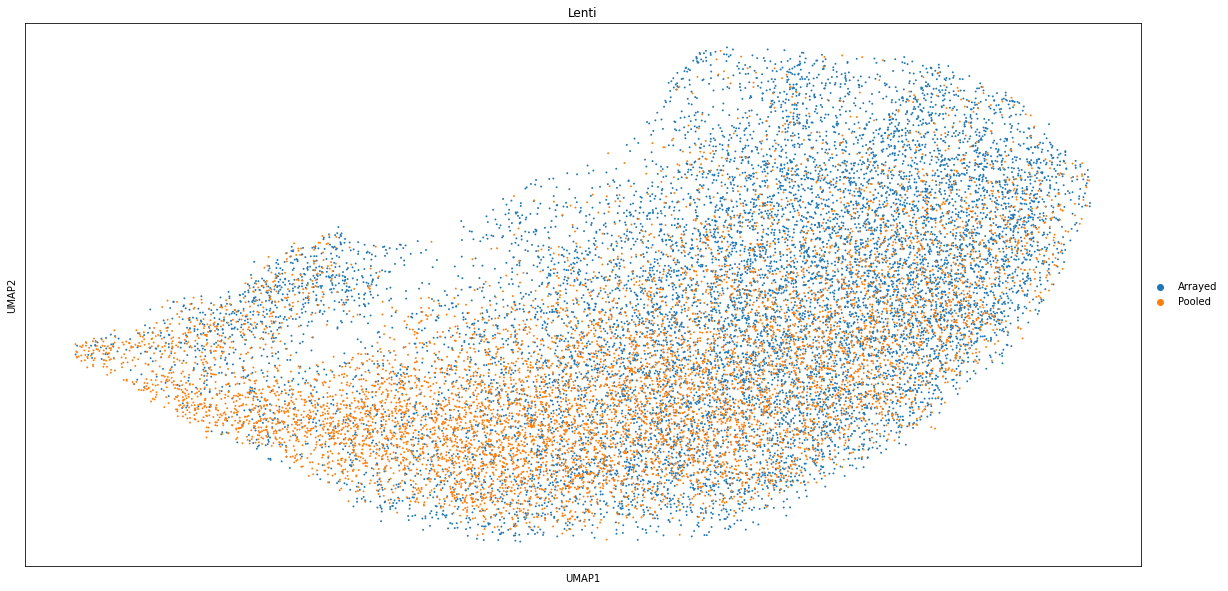

In [107]:
sc.pl.umap(adata, color="Lenti", size=15)

## Pathways

In [74]:
# Pathways
genes = {"DDX58/IFIH1-mediated induction of interferon-alpha/beta":["IRF1", "RIGI", "IRF3", "MAVS", "TBK1", "IFNB1", "IFIH1", "TRIM25", "IKBKE", "TRAF3", "RNF135", "TRIM4", "TRAF6", 
"IRF7", "SIKE1", "IFNA1", "IKBKG", "RIPK1", "CREBBP", "EP300", "CYLD", "PIN1", "RNF125", "OTUD5", "NLRX1", 
"ATG12", "ATG5", "ISG15", "IFNA2", "IFNA4", "IFNA5", "IFNA6", "IFNA7", "IFNA8", "IFNA10", "IFNA13", "IFNA14",
"IFNA16", "IFNA17", "IFNA21", "NFKB1", "RELA", "TANK", "TRAF2", "CHUK", "IKBKB", "CASP8", "CASP10", "FADD", 
"UBE2K", "PCBP2", "HERC5", "RNF216", "RPS27A", "TNFAIP3", "UBA52", "UBB", "UBC", "UBA7", "UBE2D1", "UBE2D2",
"UBE2D3", "ITCH", "NLRC5", "TAX1BP1", "UBE2L6", "NFKB2", "TKFC", "MAP3K1", "NFKBIA", "NFKBIB", "DHX58", "CD14",
"REL", "RELB", "TLR3", "TLR4", "BECN1", "RIPK3", "LY96", "TIRAP", "TICAM1", "TICAM2", "AGER", "NKIRAS2",
"NKIRAS1", "HMGB1", "HSP90AA1", "HSP90AB1", "APP", "S100A12", "S100B", "SAA1", "TOMM70", "TBKBP1", "CXCL8", "IFNG",
"MAPK9", "MAPK10", "MAP3K7", "DDX3X", "STING1", "CXCL10", "CXCL12", "SNW1", "TRADD", "DDX17", "AZI2", "IFNK",
"IFNE", "DDX3Y"],
         "Death Receptor Signalling":["IRF1", "FADD", "TRADD", "RIPK1", "BAX", "TNFRSF1A", "CASP3", "CASP7", "CASP8", "CASP10", "CASP9", "BID", "BCL2",
"DIABLO", "BIRC2", "XIAP", "CASP6", "YWHAB", "YWHAE", "YWHAG", "YWHAH", "YWHAQ", "BIRC3", "BIRC5", "BIRC7",
"BIRC8", "TNF", "FASLG", "FAS", "TNFSF10", "TNFRSF10A", "TNFRSF10B", "TNFSF12", "TNFRSF25", "CRADD", "BCL2L1", "RIPK2",
"RIPK3", "BAD", "IKBKB", "IKBKE", "MAPK1", "MAPK6", "MAPK7", "MAP2K3", "RELA", "NFKBIA", "NFKBIB", "TRAF2",
"TNFSF15", "TP53", "CASP2", "HSPA1A", "NGF", "NGFR", "TNFRSF21", "JUN", "FOS", "MAP3K1", "AKT1", "AKT2",
"AKT3", "MAPK3", "MAPK12", "MAPK15", "ATF2", "ELK1", "MAPK14", "BAG4", "DAXX", "TNFRSF12A", "AXIN1", "AXIN2",
"HIPK2", "PIDD1", "NOL3", "CYCS", "SFN", "YWHAZ", "BAK1", "HTRA2", "ENDOG", "AIFM1", "BIRC6", "NAIP",
"APAF1", "HSPB1", "HSP90AA1", "HSP90AB1", "BBC3", "CDKN1A", "CD27", "CD70", "LTBR", "TNFRSF1B", "TRAF3", "TNFSF14",
"TNFRSF18", "TNFSF18", "SIVA1", "BEX3", "TRAF1", "GCK", "TNFRSF6B", "TNFRSF10C", "TNFRSF10D", "DAPK1", "DAPK2", "DAPK3",
"MAP2K1", "MAP2K2", "MAP2K4", "MAP2K5", "MAP3K13", "MAP3K14", "MAP3K2", "MAP3K3", "MAP3K7", "MAP3K8", "MAP3K11"],
        "Interleukin-1 signaling": ["IRF1", "AGER", "ALPK1", "APP", "BTRC", "CASP8", "CHUK", "CUL1", "FBXW11",
"HMGB1", "IKBIP", "IKBKB", "IKBKG", "IL1A", "IL1B", "IL1R1", "IL1R2",
"IL1RAP", "IL1RN", "IRAK1", "IRAK2", "IRAK3", "IRAK4", "LRRC14", "MAP2K1",
"MAP2K4", "MAP2K6", "MAP3K3", "MAP3K7", "MAP3K8", "MYD88", "N4BP1", "NFKB1",
"NFKB2", "NFKBIA", "NFKBIB", "NKIRAS1", "NKIRAS2", "NLRC5", "NLRX1", "NOD1",
"NOD2", "PEDS1-UBE2V1", "PELI1", "PELI2", "PELI3", "PSMA1", "PSMA2", "PSMA3",
"PSMA4", "PSMA5", "PSMA6", "PSMA7", "PSMA8", "PSMB1", "PSMB10", "PSMB11",
"PSMB2", "PSMB3", "PSMB4", "PSMB5", "PSMB6", "PSMB7", "PSMB8", "PSMB9",
"PSMC1", "PSMC2", "PSMC3", "PSMC4", "PSMC5", "PSMC6", "PSMD1", "PSMD10",
"PSMD11", "PSMD12", "PSMD13", "PSMD14", "PSMD2", "PSMD3", "PSMD4", "PSMD5",
"PSMD6", "PSMD7", "PSMD8", "PSMD9", "PSME1", "PSME2", "PSME3", "PSME4",
"PSMF1", "RBX1", "RELA", "RIPK2", "RPS27A", "S100A12", "S100B", "SAA1",
"SEM1", "SKP1", "SQSTM1", "TAB1", "TAB2", "TAB3", "TIFA", "TNIP2",
"TOLLIP", "TP53", "TRAF2", "TRAF6", "UBA52", "UBB", "UBC", "UBE2N",
"UBE2V1", "USP14", "USP18"],
        "Golgi Associated Vesicle Biogenesis":["ACBD3", "AP1B1", "AP1G1", "AP1M1", "AP1M2", "AP1S1", "AP1S2", "AP1S3",
"AP3B1", "AP3S1", "AP4B1", "AP4E1", "ARF1", "ARRB1", "BLOC1S1", "BLOC1S3",
"BLOC1S4", "BLOC1S6", "CLINT1", "CLTA", "CLTC", "CPD", "DNAJC6", "DNM2",
"DTNBP1", "FTH1", "FTL", "GAK", "GOLGB1", "HIP1R", "HSPA8", "IGF2R",
"NAPA", "NECAP1", "OCRL", "PICALM", "PIK3C2A", "PUM1", "RAB5C", "SH3D19",
"SH3GL2", "SNAPIN", "SNX2", "SNX5", "SNX9", "SORT1", "TBC1D8B", "TFRC",
"TGOLN2", "TPD52", "TPD52L1", "TXNDC5", "VAMP2", "VAMP7", "VAMP8", "YIPF6"
],
        "Insulin Pathway": [
"AKT1", "AKT2", "AKT3", "ARAF", "BRAF", "CHUK", "HRAS", "IGF1R",
"IGF2R", "IKBKB", "IKBKG", "INSR", "JUN", "KRAS", "MAP2K1", "MAP2K2",
"MAPK10", "MAPK15", "MAPK3", "MAPK4", "MAPK6", "MAPK7", "MAPK8", "MAPK9",
"MTOR", "NRAS", "PDPK1", "PIK3C2A", "PIK3C2B", "PIK3C2G", "PIK3C3", "PIK3CA",
"PIK3CB", "PIK3CD", "PIK3CG", "PIK3R1", "PIK3R2", "PIK3R3", "PIK3R4", "PIK3R5",
"PPP1CA", "PPP1CB", "PPP1CC", "PPP1R10", "PPP1R11", "PPP1R12A", "PPP1R12B", "PPP1R12C",
"PPP1R1A", "PPP1R1B", "PPP1R1C", "PPP1R2", "PPP1R3A", "PPP1R3B", "PPP1R3C", "PPP1R3D",
"PPP1R3E", "PPP1R3F", "PPP1R7", "PPP1R8", "PPP1R9A", "PPP1R9B", "PPP2CA", "PPP2CB",
"PRKCA", "PRKCB", "PRKCG", "RAF1", "RPS6KA1", "RPS6KA2", "RPS6KA3", "RPS6KA6",
"YWHAB", "YWHAE", "YWHAG", "YWHAH", "YWHAQ", "YWHAZ"]}

## Selecting pathway genes

In [75]:
adata_selected = adata[adata.obs["IRF1"] == 1.0]
#adata_selected = adata_selected[adata_selected.obs["Perturbed"] == 'Perturbed']
adata_selected = adata_selected[:, [ind for ind, g in enumerate(adata_selected.var["features"]) 
                                    if g in genes["DDX58/IFIH1-mediated induction of interferon-alpha/beta"]]]
pd.unique(adata_selected.obs["NT"])
#adata_selected = adata_selected.copy().T
adata_selected = adata_selected[adata_selected.obs["NT"] == 'NT']

In [76]:
adata_selected.X.shape

(1555, 93)

In [77]:
adata_selected.X.shape

(1555, 93)

In [78]:
adata_selected.obs.keys()

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'IRF1',
       'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nFeature_GDO', 'HTO_maxID',
       'HTO_secondID', 'HTO_margin', 'HTO_classification',
       'HTO_classification.global', 'hash.ID', 'GDO_maxID', 'GDO_secondID',
       'GDO_margin', 'GDO_classification', 'GDO_classification.global',
       'Perturbed', 'NT', 'gene', 'Time', 'barcode', 'Lenti'],
      dtype='object')

# SVD

In [79]:
#sc.tl.pca(adata_selected) tried standard PCA

In [80]:
# SVD
eigengenes, s, eigensamples = svd(adata_selected.X.toarray())

In [81]:
eigengenes

array([[-2.43286267e-02, -2.17766161e-02,  2.98983572e-02, ...,
        -2.41043724e-02,  1.23205049e-02,  3.11963856e-03],
       [-2.57029313e-02, -6.14530494e-02, -2.11161695e-02, ...,
         2.38064732e-02,  5.50872263e-02, -7.78981297e-04],
       [-1.64147557e-02,  2.52167553e-03,  2.47440099e-02, ...,
        -5.74886488e-03, -6.32529692e-04, -2.97295746e-03],
       ...,
       [-2.35697435e-02, -3.93883413e-03, -6.52599380e-03, ...,
         9.38305613e-01,  5.39091498e-03,  4.60590080e-03],
       [-3.90164224e-02, -3.29357308e-03, -8.26941240e-03, ...,
         3.05346511e-03,  9.52792957e-01,  7.80733899e-03],
       [-2.14345734e-02, -6.29903606e-03,  2.08085554e-02, ...,
         5.49546432e-03,  5.89193808e-03,  9.56443157e-01]])

In [82]:
print(adata_selected.obs["Time"].shape, eigengenes.shape)

(1555,) (1555, 1555)


## Plotting and fitting

           3             2
9.755e-05 x - 0.0008863 x + 0.001664 x - 0.0236


<ipython-input-83-5b7f6bad3189>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_selected.obs["Time"] = [float(i[:-2]) for i in adata_selected.obs["Time"]]


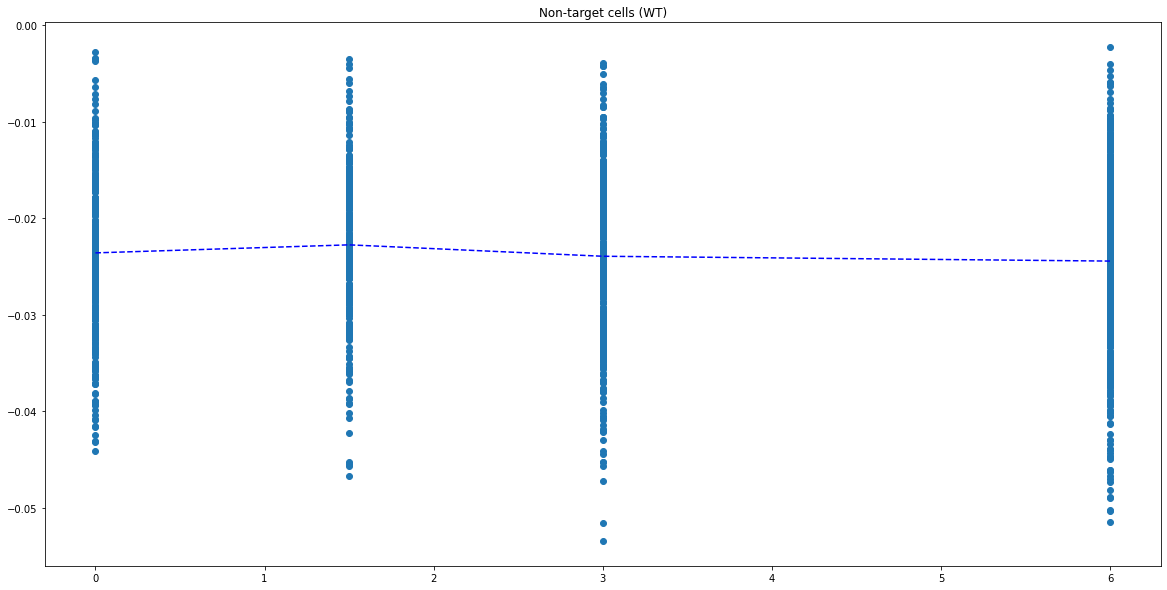

In [83]:
adata_selected.obs["Time"] = [float(i[:-2]) for i in adata_selected.obs["Time"]]
model4 = np.poly1d(np.polyfit(adata_selected.obs["Time"], eigengenes[:, 0], 3))
plt.scatter(adata_selected.obs["Time"], eigengenes[:, 0])
plt.plot(np.sort(adata_selected.obs["Time"]), model4(np.sort(adata_selected.obs["Time"])), '--', color='blue')
plt.title("Non-target cells (WT)")
print(model4)

## Separate plots for different perturbations

### DDX58/IFIH1-mediated induction of interferon-alpha/beta pathway

<ipython-input-87-de85fd220f2d>:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_selected.obs["Time"] = [float(i[:-2]) for i in adata_selected.obs["Time"]]


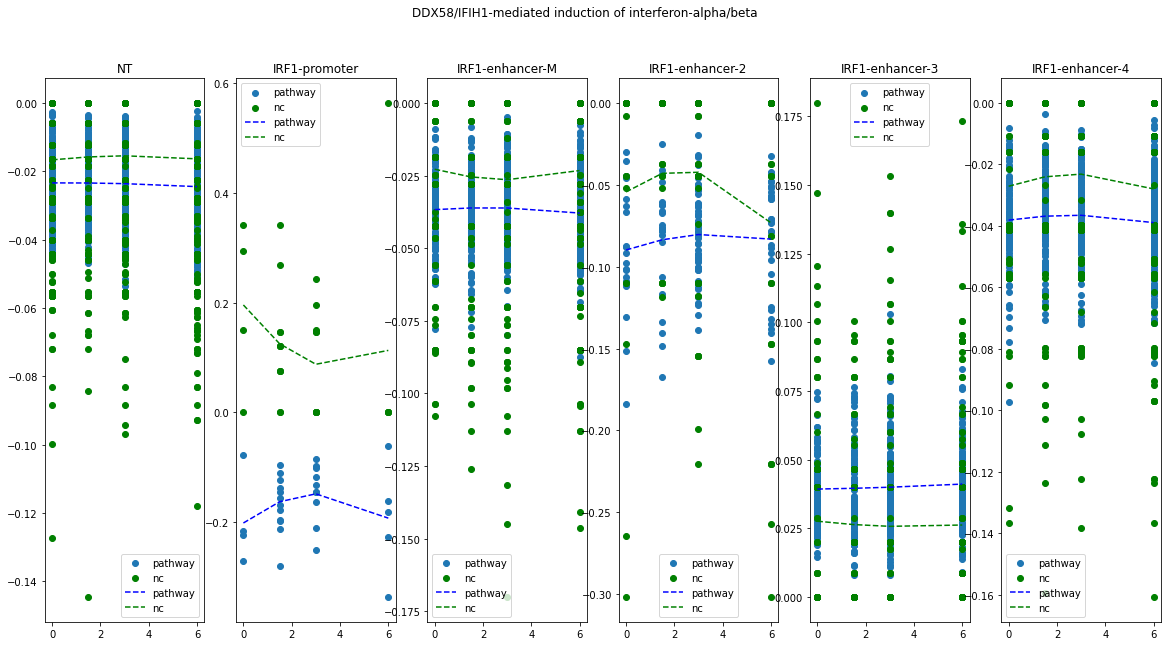

In [87]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6)
fig.suptitle("DDX58/IFIH1-mediated induction of interferon-alpha/beta")

adata_selected = adata[adata.obs["IRF1"] == 1.0]
adata_selected.obs["Time"] = [float(i[:-2]) for i in adata_selected.obs["Time"]]
adata_selected = adata_selected[:, [ind for ind, g in enumerate(adata_selected.var["features"]) 
                                    if g in genes["DDX58/IFIH1-mediated induction of interferon-alpha/beta"]]]


adata_selected_nc = adata_selected[:, [ind for ind, g in enumerate(adata_selected.var["features"]) 
                                    if g in genes["Insulin Pathway"]]]
group = ["NT", "IRF1-promoter", 'IRF1-enhancer-M', 'IRF1-enhancer-2', 'IRF1-enhancer-3', 'IRF1-enhancer-4']
for g in zip(group, (ax1, ax2, ax3, ax4, ax5, ax6)):
    # Selecting perturbation
    adata_selected_group = adata_selected[adata_selected.obs["NT"] == g[0]]
    adata_selected_group_nc = adata_selected_nc[adata_selected_nc.obs["NT"] == g[0]]
    
    # svd
    eigengenes, s, eigensamples = svd(adata_selected_group.X.toarray())
    eigengenes_nc, s_nc, eigensamples_nc = svd(adata_selected_group_nc.X.toarray())
    
    # model fitting
    model4 = np.poly1d(np.polyfit(adata_selected_group.obs["Time"], eigengenes[:,0], 2))
    model4_nc = np.poly1d(np.polyfit(adata_selected_group_nc.obs["Time"], eigengenes_nc[:,0], 2))
    
    # plotting
    g[1].scatter(adata_selected_group.obs["Time"], eigengenes[:,0])
    g[1].scatter(adata_selected_group_nc.obs["Time"], eigengenes_nc[:,0], color="green")
    
    g[1].plot(np.sort(adata_selected_group.obs["Time"]), model4(np.sort(adata_selected_group.obs["Time"])), '--', color='blue')
    g[1].plot(np.sort(adata_selected_group_nc.obs["Time"]), model4_nc(np.sort(adata_selected_group_nc.obs["Time"])), '--', color='green')
    
    g[1].set_title(g[0])
    g[1].legend(['pathway', 'nc', 'pathway', 'nc'])
plt.show()

### "Interleukin-1 signaling"

<ipython-input-88-93ca809cb49b>:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_selected.obs["Time"] = [float(i[:-2]) for i in adata_selected.obs["Time"]]


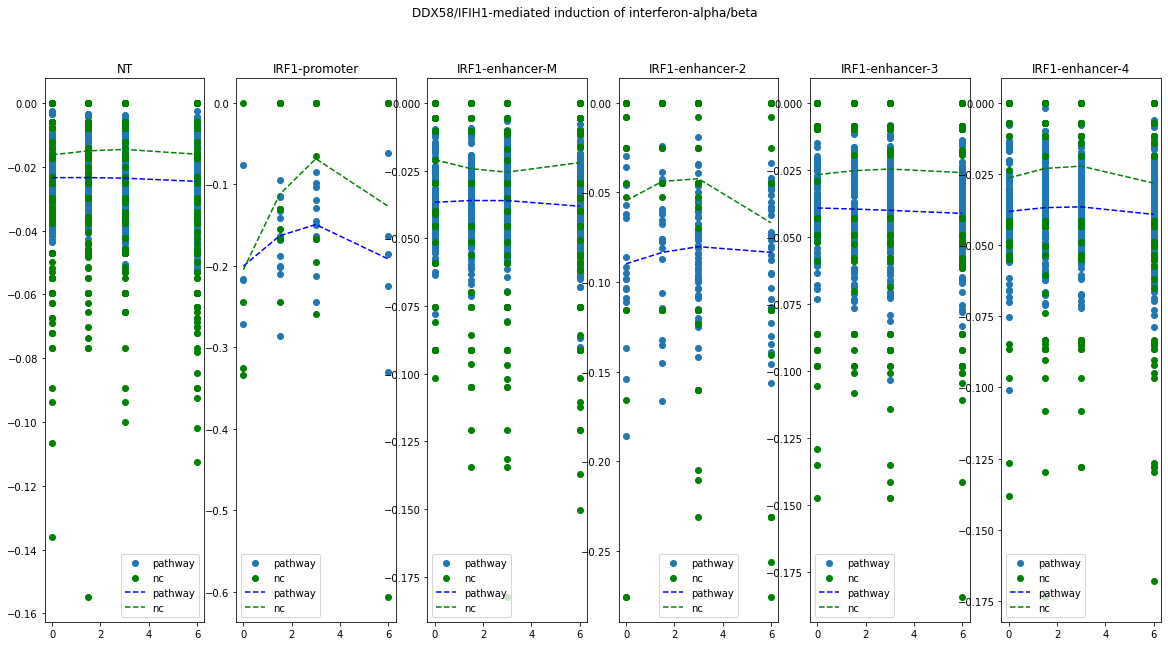

In [88]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6)
fig.suptitle("DDX58/IFIH1-mediated induction of interferon-alpha/beta")

adata_selected = adata[adata.obs["IRF1"] == 1.0]
adata_selected.obs["Time"] = [float(i[:-2]) for i in adata_selected.obs["Time"]]
adata_selected = adata_selected[:, [ind for ind, g in enumerate(adata_selected.var["features"]) 
                                    if g in genes["Interleukin-1 signaling"]]]


adata_selected_nc = adata_selected[:, [ind for ind, g in enumerate(adata_selected.var["features"]) 
                                    if g in genes["Insulin Pathway"]]]
group = ["NT", "IRF1-promoter", 'IRF1-enhancer-M', 'IRF1-enhancer-2', 'IRF1-enhancer-3', 'IRF1-enhancer-4']
for g in zip(group, (ax1, ax2, ax3, ax4, ax5, ax6)):
    # Selecting perturbation
    adata_selected_group = adata_selected[adata_selected.obs["NT"] == g[0]]
    adata_selected_group_nc = adata_selected_nc[adata_selected_nc.obs["NT"] == g[0]]
    
    # svd
    eigengenes, s, eigensamples = svd(adata_selected_group.X.toarray())
    eigengenes_nc, s_nc, eigensamples_nc = svd(adata_selected_group_nc.X.toarray())
    
    # model fitting
    model4 = np.poly1d(np.polyfit(adata_selected_group.obs["Time"], eigengenes[:,0], 2))
    model4_nc = np.poly1d(np.polyfit(adata_selected_group_nc.obs["Time"], eigengenes_nc[:,0], 2))
    
    # plotting
    g[1].scatter(adata_selected_group.obs["Time"], eigengenes[:,0])
    g[1].scatter(adata_selected_group_nc.obs["Time"], eigengenes_nc[:,0], color="green")
    
    g[1].plot(np.sort(adata_selected_group.obs["Time"]), model4(np.sort(adata_selected_group.obs["Time"])), '--', color='blue')
    g[1].plot(np.sort(adata_selected_group_nc.obs["Time"]), model4_nc(np.sort(adata_selected_group_nc.obs["Time"])), '--', color='green')
    
    g[1].set_title(g[0])
    g[1].legend(['pathway', 'nc', 'pathway', 'nc'])
plt.show()